# 1) Importing Libraries

In [2]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# 2) Data Extraction

In [3]:
df=pd.read_csv('worldcup_data.csv')
df.head(4)

,Unnamed: 0,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
0,Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,...,Australia,Aiden_Markram,Right,40,111.1,SouthAfrica,119,1,Josh_Hazlewood,Australia
1,Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,...,England,Jos_Buttler,Right,24,109.1,England,56,1,Moeen_Ali,England
2,Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,...,Bangladesh,Charith_Asalanka,Left,80,163.2,Srilanka,172,1,Charith_Asalanka,Srilanka
3,Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,...,Pakistan,Muhammad_Rizwan,Right,79,143.6,Pakistan,152,1,Shaheen_shah,Pakistan


In [4]:
df.tail()

,Unnamed: 0,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
28,Match_29,Pakistan,ScotLand,Group_stage,Pakistan,Batting,evening,Sharjah,27,Shadab_Khan,...,Pakistan,Babar_Azam,Right,66,140.43,Pakistan,190,0,Shoaib_Malik,Pakistan
29,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,...,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India
30,Match_31,New_Zealand,England,Semi_Final,New_Zealand,Fielding,evening,Abu_Dhabi,28,Liam_Livingstone,...,England,Daryl_Mitchell,Right,72,153.19,New_Zealand,167,1,Daryl_Mitchell,New_Zealand
31,Match_32,Australia,Pakistan,Semi_Final,Australia,Fielding,evening,Dubai,29,Shadab_Khan,...,Pakistan,Muhammad_Rizwan,Right,67,128.85,Pakistan,177,1,Matthew_Wade,Australia
32,Match_33,Australia,New_Zealand,Final,Australia,Fielding,evening,Dubai,26,Josh_Hazlewood,...,Australia,Kane_Williamson,Right,85,177.08,New_Zealand,173,1,Mitchell_Marsh,Australia


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               33 non-null     object 
 1   team_1                   33 non-null     object 
 2   team_2                   33 non-null     object 
 3   stage                    33 non-null     object 
 4   Winner_toss              33 non-null     object 
 5   Toss_descision           33 non-null     object 
 6   time                     33 non-null     object 
 7   venue                    33 non-null     object 
 8   avg_temperature          33 non-null     int64  
 9   best_bowler              33 non-null     object 
 10  bowling_arm              33 non-null     object 
 11  bowling_style            33 non-null     object 
 12  most_individual_wickets  33 non-null     int64  
 13  economy                  33 non-null     float64
 14  best_bowler_country      33 

In [6]:
#rename attribute
df=df.rename(columns={'Unnamed: 0':'Match Number'})
df.head()

,Match Number,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
0,Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,...,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,1,Josh_Hazlewood,Australia
1,Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,...,England,Jos_Buttler,Right,24,109.10,England,56,1,Moeen_Ali,England
2,Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,...,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,1,Charith_Asalanka,Srilanka
3,Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,...,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,1,Shaheen_shah,Pakistan
4,Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,...,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,0,Mujeeb_ur_Rehman,Afghanistan


In [7]:
#indexing match number
df=df.set_index('Match Number')

In [8]:
df.head(4)

,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
Match Number,,,,,,,,,,,,,,,,,,,,,
Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,Right,...,Australia,Aiden_Markram,Right,40,111.1,SouthAfrica,119,1,Josh_Hazlewood,Australia
Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,Right,...,England,Jos_Buttler,Right,24,109.1,England,56,1,Moeen_Ali,England
Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,Left,...,Bangladesh,Charith_Asalanka,Left,80,163.2,Srilanka,172,1,Charith_Asalanka,Srilanka
Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,Left,...,Pakistan,Muhammad_Rizwan,Right,79,143.6,Pakistan,152,1,Shaheen_shah,Pakistan


In [9]:
df.shape

(33, 23)

In [10]:
df.describe()

,avg_temperature,most_individual_wickets,economy,high_indvidual_scores,strike_rate,target,target_achieved
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,29.272727,2.878788,5.215758,62.393939,152.402121,146.606061,0.696970
std,2.577217,0.892944,2.187966,20.135385,33.999070,37.136521,0.466694
min,20.000000,1.000000,0.900000,24.000000,97.060000,56.000000,0.000000
25%,28.000000,2.000000,4.000000,45.000000,136.360000,125.000000,0.000000
50%,29.000000,3.000000,4.800000,65.000000,153.190000,152.000000,1.000000
75%,30.000000,3.000000,6.250000,79.000000,162.900000,173.000000,1.000000
max,34.000000,5.000000,12.000000,101.000000,263.160000,211.000000,1.000000


# 3) Data Visualization 

Text(0.5, 1.0, 'Pearson Correlation')

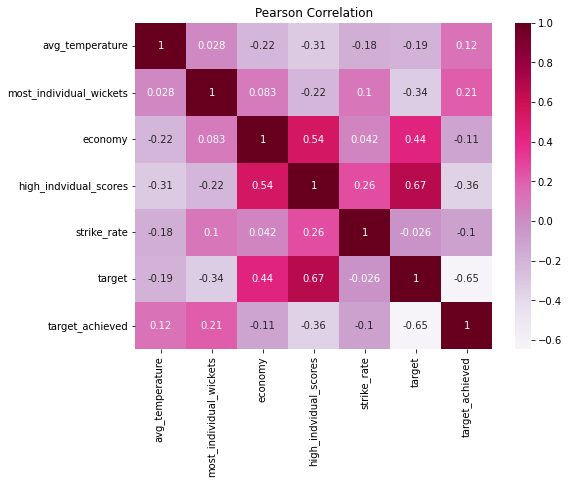

In [12]:
#heatmap correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='PuRd')
plt.title('Pearson Correlation')

In [19]:
df['Winner_toss'].value_counts()

Australia      6
Afghanistan    5
Pakistan       4
England        3
SouthAfrica    3
New_Zealand    3
Srilanka       2
Bangladesh     2
Namibia        2
India          2
Windies        1
Name: Winner_toss, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


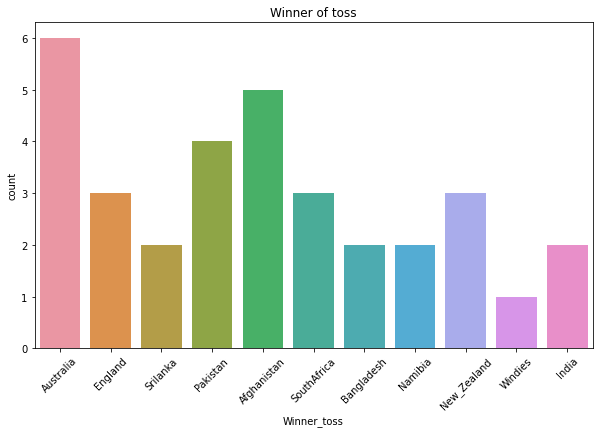

In [21]:
#visualize Winner of toss 
plt.figure(figsize=(10,6))
chart=sns.countplot(df['Winner_toss'])
chart.set_xticklabels(chart.get_xticklabels(),rotation= 45 )
plt.title('Winner of toss')
plt.show()

In [22]:
df['Toss_descision'].value_counts()

Fielding    26
Batting      7
Name: Toss_descision, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


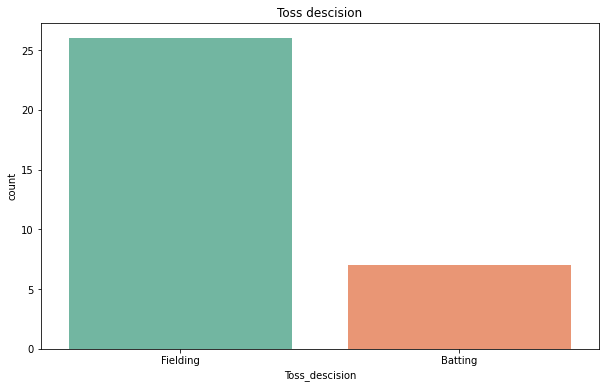

In [25]:
#visulize toss decision
plt.figure(figsize=(10,6))
chart=sns.countplot(df['Toss_descision'],palette='Set2')
plt.title('Toss descision')
plt.show()

In [26]:
df['venue'].value_counts()

Dubai        13
Abu_Dhabi    11
Sharjah       9
Name: venue, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


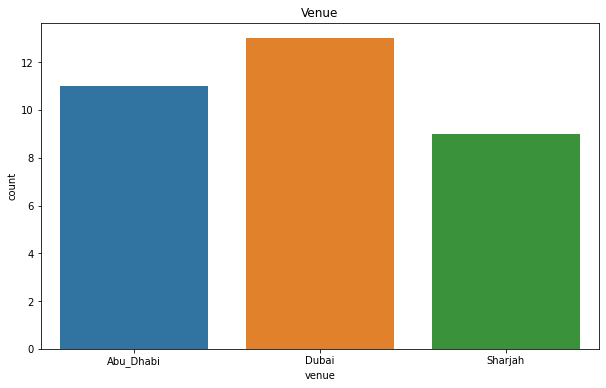

In [27]:
#visualize venue
plt.figure(figsize=(10,6))
sns.countplot(df['venue'])
plt.title('Venue')
plt.show()

In [28]:
df['Winner'].value_counts()

Australia      6
Pakistan       5
New_Zealand    5
England        4
SouthAfrica    4
India          3
Srilanka       2
Afghanistan    2
Namibia        1
Windies        1
Name: Winner, dtype: int64

C:\Users\LENOVO\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


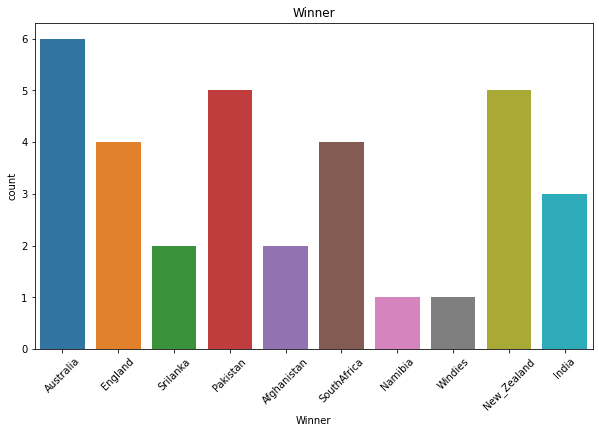

In [29]:
#visualize winner
plt.figure(figsize=(10,6))
chart=sns.countplot(df['Winner'])
chart.set_xticklabels(chart.get_xticklabels(),rotation= 45 )
plt.title('Winner')
plt.show()

# 4) Classification

In [30]:
#handling categorical data
for i in df.columns.tolist():
    df[i]=df[i].astype('category').cat.codes
df.head()    

,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
Match Number,,,,,,,,,,,,,,,,,,,,,
Match_1,1,10,1,1,1,0,0,5,9,1,...,1,1,1,4,5,8,6,1,12,1
Match_2,2,12,1,3,1,1,1,7,1,1,...,3,9,1,0,3,3,0,1,17,2
Match_3,8,2,1,9,1,0,2,8,19,0,...,2,3,0,21,25,9,21,1,3,8
Match_4,6,4,1,7,1,1,1,8,18,0,...,7,16,1,20,11,6,15,1,26,6
Match_5,0,9,1,0,0,1,2,7,13,1,...,0,17,0,11,27,0,25,0,19,0


In [31]:
#spliting data
X=df.drop('target_achieved',axis=1)
y=df['target_achieved']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=0)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(23, 22)
(23,)
(10, 22)
(10,)


In [32]:
#building model
nb= GaussianNB()
%time nb.fit(X_train,y_train)
accuracy = nb.score(X_test,y_test)
print('Accuracy score: ',int(accuracy*100),'%')

Wall time: 25 ms
Accuracy score:  80 %


In [33]:
#prediction
y_pred= nb.predict(X_test)
print(y_pred)


[1 0 1 1 0 0 0 0 1 1]


In [35]:
#confusion matrix
matrix= metrics.confusion_matrix(y_test,y_pred)
print (matrix)

[[3 0]
 [2 5]]


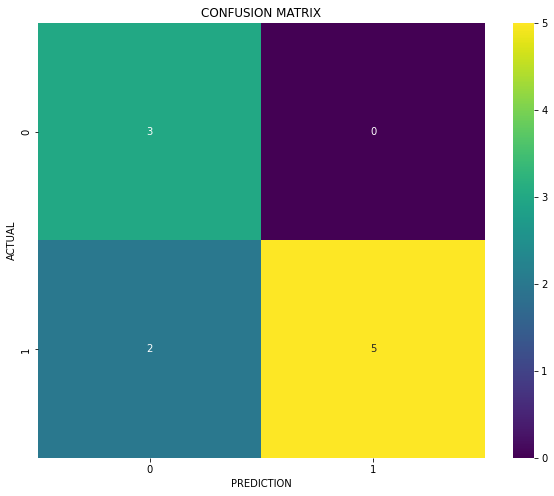

In [38]:
#heatmap matrix
plt.figure(figsize=(10,8))
sns.heatmap(matrix,annot=True, fmt='.0f',cmap='viridis')
plt.title('CONFUSION MATRIX')
plt.xlabel('PREDICTION')
plt.ylabel('ACTUAL')
plt.show()

In [39]:
#classification report
report=metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

